<a href="https://colab.research.google.com/github/jajakiez/Algorithms/blob/master/intership_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title:
# **Marketing Campaign for Banking Products**

**Data Description:**

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**Data Source**: https://www.kaggle.com/itsmesunil/bank-loan-modelling/download

**Context:**

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.


**Attribute Information:**

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?

**Objective:**

The classification goal is to predict the likelihood of a liability customer buying personal
loans with the help of  Exploratory Data Analysis (EDA) tools and Applied Statistics concepts to verify the significance of each independent attribute towards predicting probability of a cutomer for buying the personal loan.




In [125]:
#Importing important Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm
import pylab as pl
%matplotlib inline
sns.set(style="ticks")
from scipy.stats import zscore


In [126]:
#Upload file
from google.colab import files
uploaded = files.upload()


Saving intership_studio_project.csv to intership_studio_project (2).csv


In [139]:
#Importing data in dataframe
import io
data = pd.read_csv(io.BytesIO(uploaded['intership_studio_project.csv']))


In [140]:
#Checking number of rows and columns in dataset
data.shape


(5000, 14)

In [141]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [142]:
#Veiwing first and Last 5 rows of dataset
data.head(5000)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [143]:
#Checking the data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are 14 attributes :

ID         : Customer ID							
Age	       : Customer's age in completed years							
Experience : years of professional experience							
Income     :	Annual income of the customer 							
ZIPCode    :	Home Address ZIP code.							
Family     :	Family size of the customer							
CCAvg      :	Avg. spending on credit cards per month 							
Education  : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/        
             Professional
Mortgage   :	Value of house mortgage if any		
Personal Loan : Did this customer accept the personal loan offered in the 
                last campaign?							
Securities Account :	Does the customer have a securities account with the bank?CD Account :	Does the customer have a certificate of deposit (CD) account with 
              the bank?							
Online     :	Does the customer use internet banking facilities?							
CreditCard :	Does the customer use a credit card issued by UniversalBank?							





In [144]:
#Checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [145]:
#finding unique data
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [146]:
#Finding the Summary Stats
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Observations from data :
we have few negative values in experience column which can never be negative , so we need to have look at and update to median(best suited).

In [147]:
data['Experience'].mask(data['Experience'] < 0, data.Experience.median(), inplace=True)


In [148]:
#Again check for negative values
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We can eliminate Noise from our Dataset. So, ID and Zipcode might be removed as they may not be useful for our analysis 

In [149]:
#Eliminating the Noise
data.drop(['ID','ZIP Code'],axis=1,inplace=True)

Now we have to check if Noise is removed :

In [150]:
data.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [151]:
data.skew(numeric_only=True)

Age                  -0.029341
Experience           -0.014100
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

Comparing all attributes visually to check for relationships that can be exploited :


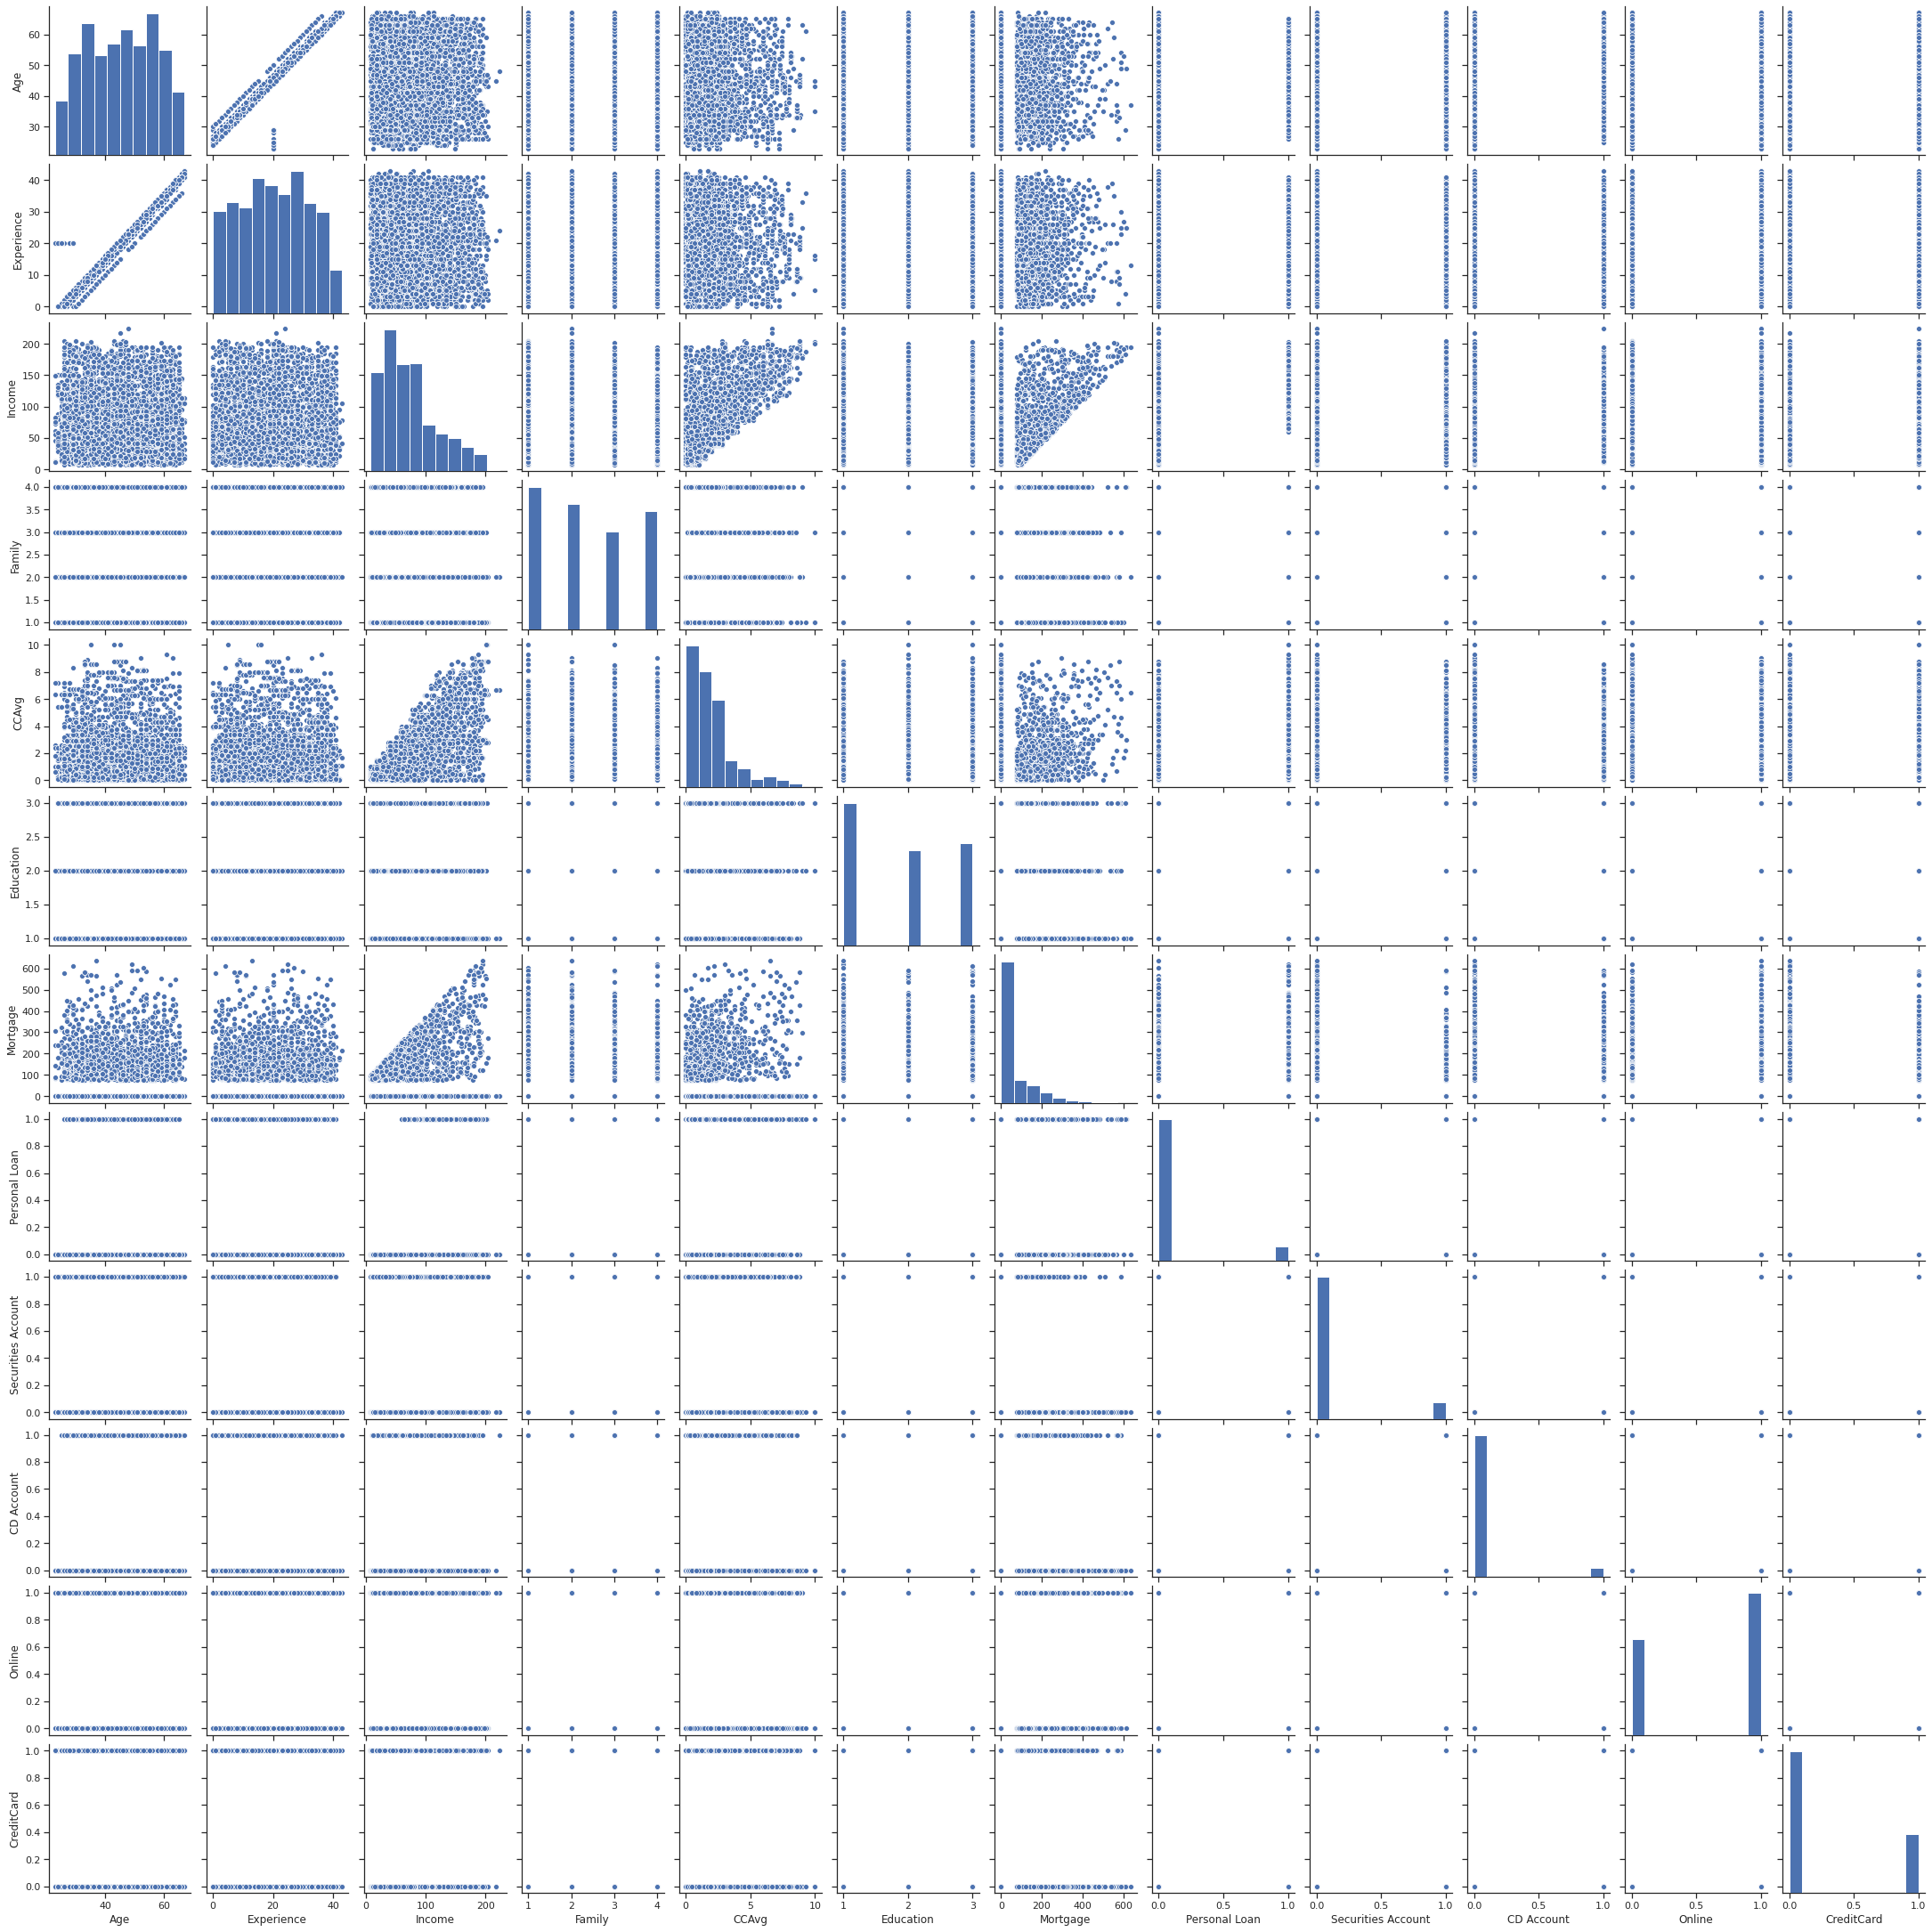

In [152]:
#Comparing Attributes
sns.pairplot(data.iloc[:,:])

## Observations From plots :

a)Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

b)Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

c)Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

d)CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

e)Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

f)The variables family and education are ordinal variables. The distribution of families is evenly distributes

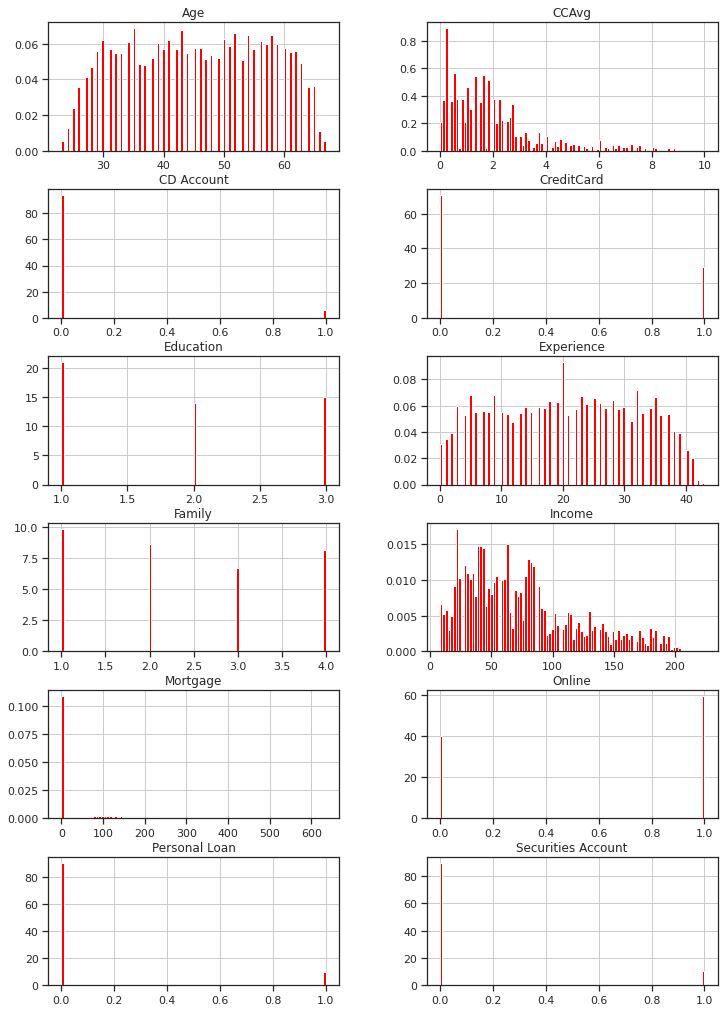

In [47]:
#Histogram of attributes
columns = list(data)[:]
data[columns].hist(stacked=False, bins=100,density=True, color='red', figsize=(12,30), layout=(10,2)); 

## Observations from Histograms :
a)Age & Experience are almost equally distributed.

b)Income & Credit card spending are skewed to the left.

c)Also we have more Undergraduates than Graduate and Advanced & Professional.

d)More than 60% of customers have enabled online banking and went digital.

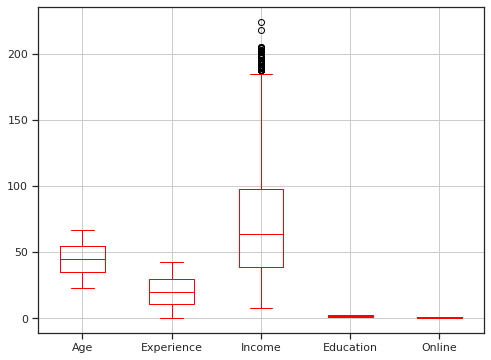

In [48]:
#boxplot for some attributes
data.boxplot(return_type='axes',color='red',figsize=(8,6),column=['Age','Experience','Income','Education','Online']);


## Observations from boxplot :

a) Income has too much noise and slightly skewed right.

b) Age and experience are equally distributed.

c) Education and Online are almost equally distributed.

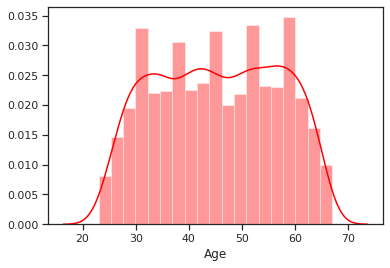

In [49]:
#distplot
sns.distplot( data['Age'], color = 'red')

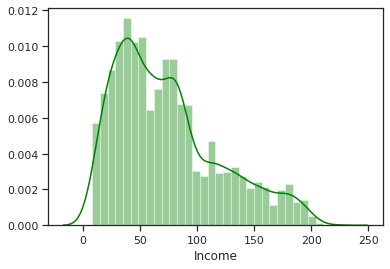

In [50]:
sns.distplot( data['Income'], color = 'green')

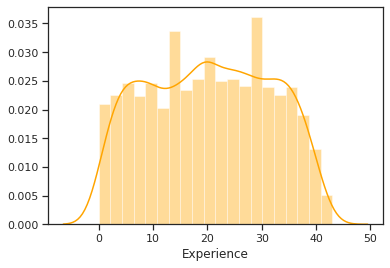

In [51]:
sns.distplot( data['Experience'], color = 'orange')

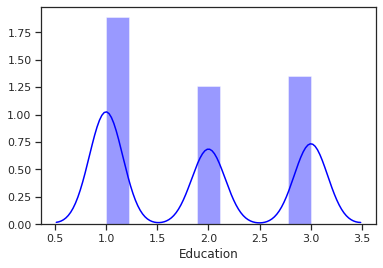

In [52]:
sns.distplot( data['Education'], color = 'blue')

## Observation
a)Most of the customers age fall in the age range of 30 to 60 yrs

b)Experience falls in the range of 5 to 35 years and most earn an income between 10K to 100K

In [53]:
#Explore the account holder's distribution
def SD_CD(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return"Holds Securities & deposit"
    elif(row['Securities Account']==0) & (row['CD Account']==0):
        return"Does not hold any securities or deposit"
    elif(row['Securities Account']==1) & (row['CD Account']==0):
        return "Holds only Securities Account"
    elif(row['Securities Account']==0) & (row['CD Account']==1):
        return"Holds only deposit"


In [55]:
data['Account_Holder_Category']=data.apply(SD_CD,axis=1)

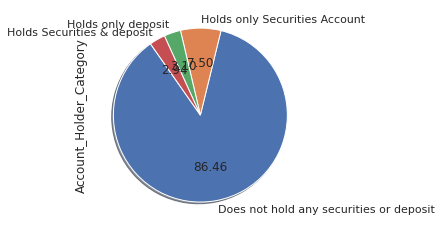

In [56]:
data['Account_Holder_Category'].value_counts().plot.pie(shadow=True, startangle=125,autopct='%.2f')

## Observation :

We could see that alomst **87%** of customers do not hold any securities or deposit, and 3 % hold both securities as well as deposit. It will be good if we **encourage those 87%** to open any of these account as it will **improve the assests of the bank**.

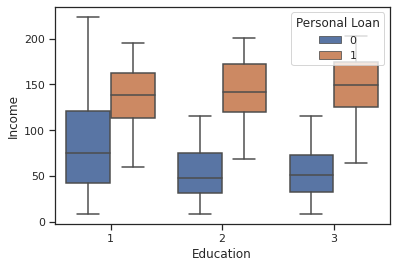

In [57]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=data)

## Observation :

It seems the customers whose education level is 1 is having more income. However customers who has **taken the personal loan have the same income levels**

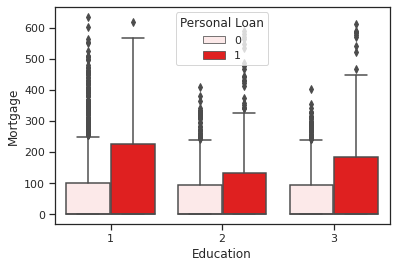

In [58]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='red')

## Observation :

From the above chart it seems that customer who do not have personal loan and customer **who has personal loan have high mortgage**.

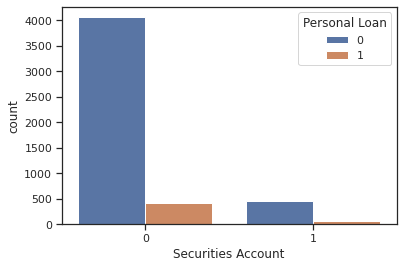

In [154]:
sns.countplot(x="Securities Account", data=data, hue="Personal Loan")

## Observation :

Majority of customers who does not have loan have securities account

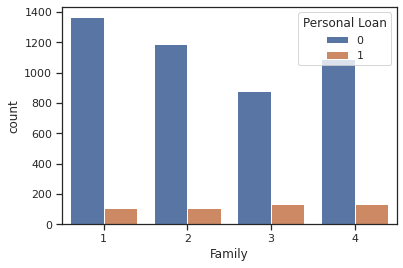

In [155]:
sns.countplot(x="Family", data=data,hue="Personal Loan")

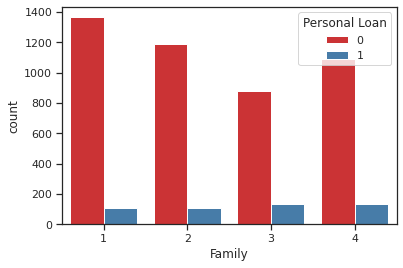

In [62]:
sns.countplot(x='Family',data=data,hue='Personal Loan',palette='Set1')

## Observation:

Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

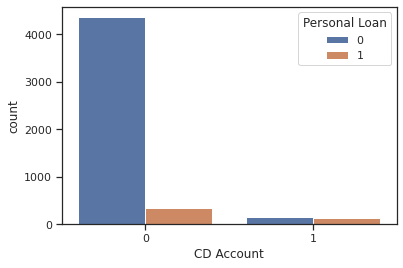

In [63]:
sns.countplot(x="CD Account", data=data,hue="Personal Loan")

## Observation:

Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

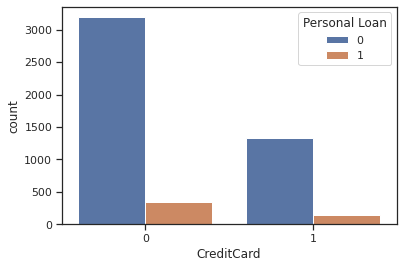

In [64]:
sns.countplot(x="CreditCard", data=data, hue="Personal Loan")

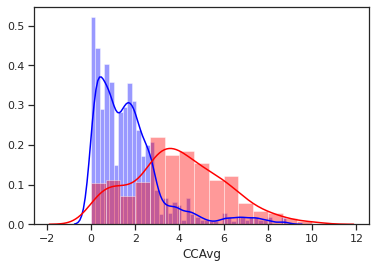

In [65]:

sns.distplot( data[data["Personal Loan"] == 0]['CCAvg'], color = 'blue')
sns.distplot( data[data["Personal Loan"] == 1]['CCAvg'], color = 'red')

In [66]:
print('Credit card spending of Non-Loan customers: ',data[data["Personal Loan"] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data["Personal Loan"] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


## Observation:

The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

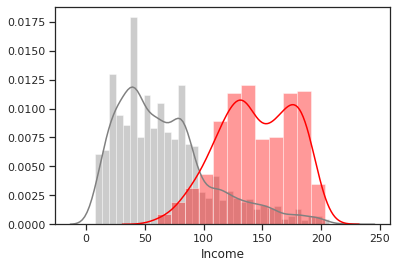

In [67]:
sns.distplot( data[data["Personal Loan"] == 0]['Income'], color = 'grey')
sns.distplot( data[data["Personal Loan"] == 1]['Income'], color = 'red')

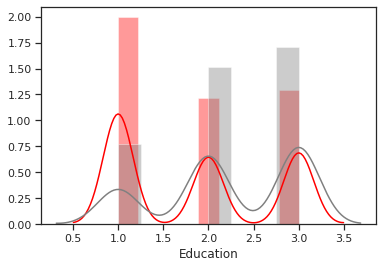

In [68]:

sns.distplot( data[data["Personal Loan"] == 0]['Education'], color = 'red')
sns.distplot( data[data["Personal Loan"] == 1]['Education'], color = 'grey')

## Correlation Check

In [69]:
# It will show correlation matrix
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045528,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048718,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018074,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013365,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014013,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000465,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005526,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


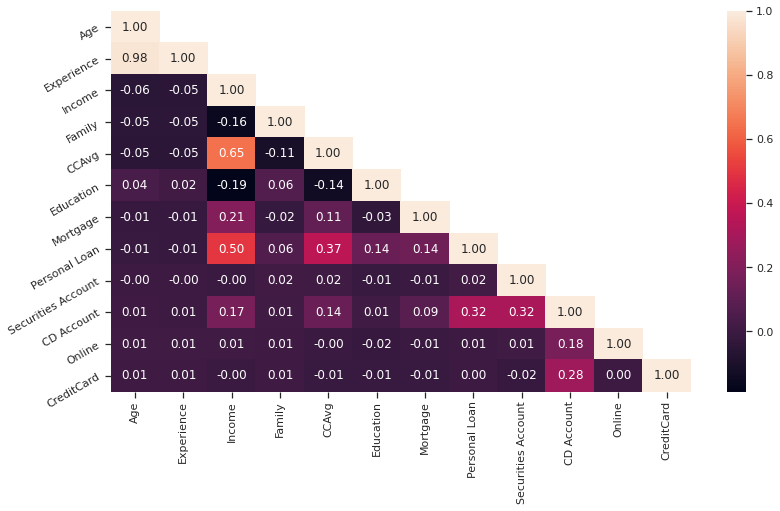

In [70]:
#However we want to see correlation in graphical representation so below is function for that
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Observation:

a)Income and CCAvg is moderately correlated.

b)Age and Experience is highly correlated.

In [157]:
def plot_corr(data, size=10):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, 25))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

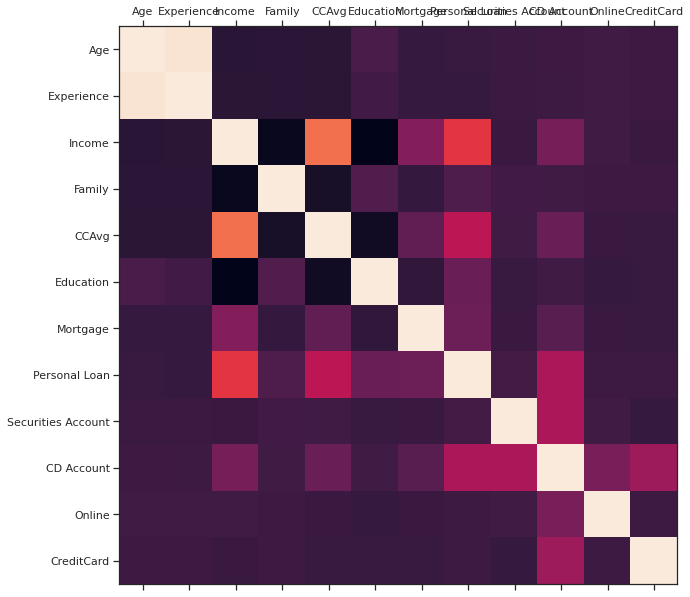

In [159]:
plot_corr(data)

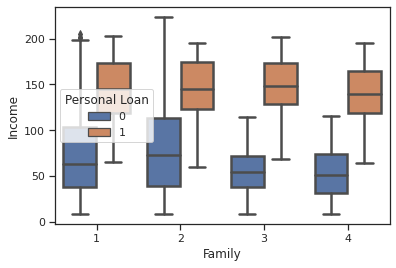

In [71]:
sns.boxplot(x=data.Family,y=data.Income,hue=data["Personal Loan"])
# Looking at the below plot, families with income less than 100K are less likely to take loan,than families with 
# high income

# **Applying Models**

## Train and Test Data

In [164]:
print(data['Personal Loan'].value_counts())
No_of_customers_availed_PL=data[data['Personal Loan']==1].shape[0]
No_of_customers_availed_PL
Total_Cust=data.shape[0]
percet=(No_of_customers_availed_PL * 100)/Total_Cust 
print("Overall percentage of customers who have availed personal Loan:{}".format(percet),"%")

0    4520
1     480
Name: Personal Loan, dtype: int64
Overall percentage of customers who have availed personal Loan:9.6 %


Imbalance in dataset:

As you could see, our Target variable is not equally distributed, only 9.6% of customers have availed Personal Loan. So, if our model is going to learn from this dataset and do the prediction chances are there that it might be biased towards the Majority class (In this case , Personal loan not being availed by the customer) and ignore the minority class. Hence , we should try to balance our dataset to make our model learn and predict with being biased and treat both classes equally for better result

# **Logistic Regression**

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [169]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['Experience'], axis=1), test_size=0.3 , random_state=100)

In [170]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [171]:
#create model using constructor
LogRegModel = LogisticRegression()
# fit the model to training set
LogRegModel.fit(train_set,train_labels)
# Predict the test data to get y_pred
y_pred = LogRegModel.predict(test_set)
# get accuracy of model
lr_acc_score = accuracy_score(test_labels,y_pred)
# get F1-score of model
lr_f1_score = f1_score(test_labels,y_pred) 
# get the confusion matrix
lr_confmat = confusion_matrix(test_labels,y_pred)
# get the classification report
lr_classrep = classification_report(test_labels,y_pred)

print("The accuracy of the model is {} %".format(lr_acc_score*100))
print("The f1-score of the model is {} %".format(lr_f1_score*100))
print("The confusion matrix for logistic regression is: \n",lr_confmat)
print("Detailed classification report for logistic regression is: \n",lr_classrep)

The accuracy of the model is 93.93333333333334 %
The f1-score of the model is 65.91760299625469 %
The confusion matrix for logistic regression is: 
 [[1321   21]
 [  70   88]]
Detailed classification report for logistic regression is: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1342
           1       0.81      0.56      0.66       158

    accuracy                           0.94      1500
   macro avg       0.88      0.77      0.81      1500
weighted avg       0.93      0.94      0.93      1500



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **Random Forest Classifier**

In [172]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

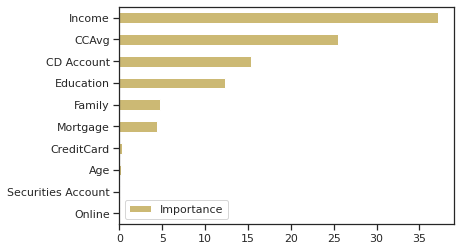

In [173]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='y', )

In [174]:
predicted_random=randomforest_model.predict(test_set)
randomforest_model.score(test_set,test_labels)

0.912

In [175]:
print(metrics.confusion_matrix(test_labels, predicted_random))

[[1342    0]
 [ 132   26]]


# **KNN ( K - Nearest Neighbour )**

In [177]:
train_set_indep = data.drop(['Experience'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = data["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [178]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9152768512341561


In [179]:
print(metrics.confusion_matrix(Y_Test, predicted))

[[1338   35]
 [  92   34]]


# **Naive Bayes**

In [180]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.884

In [181]:
print(metrics.confusion_matrix(test_labels, prediction))

[[1230  112]
 [  62   96]]



# **Decision Tree Classifier**

In [182]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [183]:
dt_model.score(test_set , test_labels)

0.9773333333333334

In [184]:
y_predict = dt_model.predict(test_set)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [185]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[1336    6]
 [  28  130]]


In [186]:
test_set.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
789,29,31,4,0.3,2,0,0,0,1,0
2507,59,60,4,2.1,1,234,0,0,1,1
2376,58,23,3,0.2,1,0,0,0,0,0
1378,54,34,4,0.1,3,0,0,0,1,0
598,56,11,2,0.2,3,90,0,0,0,0


# **Model Comparison**

In [188]:
X=data.drop(['Personal Loan','Experience'],axis=1)
y=data.pop('Personal Loan')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.914600 (0.011351)
Decisiontree: 0.982600 (0.002835)
NB: 0.883000 (0.011567)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.987000 (0.003493)


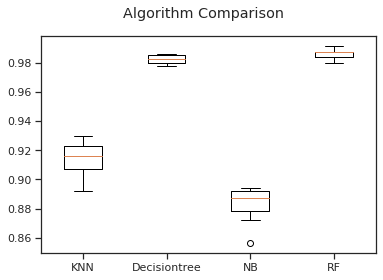

In [189]:
from sklearn import model_selection
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decisiontree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# **Conclusion**

The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Logistic Regression and four classification algorithms were used in this study. From the above graph , it seems like **Decision Tree algorithm** have the **highest accuracy** and we can choose that as our final model.